In [1]:
import pandas
import dataset.fashion_mnist.utils.mnist_reader as mnist_reader
import torch
import tqdm
import sklearn.metrics as sm
import numpy as np
import matplotlib.pyplot as plt
import torchvision

In [2]:
# 使用 GPU
def try_gpu(i=0):  #@save
    """如果存在，则返回gpu(i)，否则返回cpu()"""
    if torch.cuda.device_count() >= i + 1:
        return torch.device(f'cuda:{i}')
    return torch.device('cpu')

def try_all_gpus():  #@save
    """返回所有可用的GPU，如果没有GPU，则返回[cpu(),]"""
    devices = [torch.device(f'cuda:{i}')
             for i in range(torch.cuda.device_count())]
    return devices if devices else [torch.device('cpu')]

# 多层感知机
class MLP(torch.nn.Module):
    def __init__(self,num_i, num_h1, num_h2, num_h3, num_o):
        super(MLP,self).__init__()
        self.Flatten = torch.nn.Flatten()
        self.h1 = torch.nn.Linear(num_i, num_h1)
        self.h2 = torch.nn.Linear(num_h1, num_h2)
        self.h3 = torch.nn.Linear(num_h2, num_h3)
        self.h4 = torch.nn.Linear(num_h3, num_o)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = torch.nn.functional.relu(self.h1(x))
        x = torch.nn.functional.relu(self.h2(x))
        x = torch.nn.functional.relu(self.h3(x))
        x = torch.nn.functional.log_softmax(self.h4(x), dim=1)
        return x

def init_weights(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.normal_(m.weight, std=0.01)

# 数据预处理：标准化图像数据，使得灰度数据在-1到+1之间
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.5,), (0.5,))])

# 下载Fashion-MNIST训练集数据，并构建训练集数据载入器trainloader,每次从训练集中载入64张图片，每次载入都打乱顺序
trainset = torchvision.datasets.FashionMNIST('dataset/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# 下载Fashion-MNIST测试集数据，并构建测试集数据载入器trainloader,每次从测试集中载入64张图片，每次载入都打乱顺序
testset = torchvision.datasets.FashionMNIST('dataset/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [3]:
# 训练
from zmq import device

model = MLP(784, 256, 128, 64, 10)
model = model.to(device=try_gpu())
model.apply(init_weights)

model.train()

cost = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters())

loss_data = {
    "epoch" : [],
    "loss" : []
}

for i in tqdm.tqdm(range(10)):
    for images, labels in trainloader:
        images = images.to(device=try_gpu())
        labels = labels.to(device=try_gpu())
        y_predict = model(images)
        optimizer.zero_grad()
        loss = cost( y_predict, labels )
        loss_data["epoch"].append(i)
        loss_data["loss"].append(float(loss))
        loss.backward()
        optimizer.step()

100%|██████████| 10/10 [02:07<00:00, 12.72s/it]


{'epoch': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

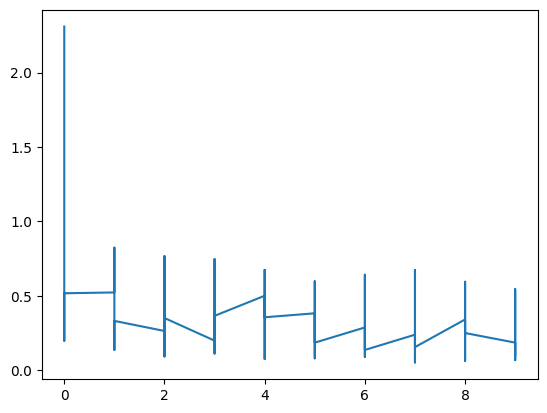

In [4]:
print(loss_data)
plt.plot(loss_data["epoch"], loss_data["loss"])
plt.show()

In [5]:
model.eval()
yhat = []
epoch = 0
accuracy_sum = 0
for images, labels in testloader:
    images = images.to(device=try_gpu())
    labels = labels.to(device=try_gpu())
    y_predict = model(images)
    y_predict = torch.argmax(y_predict, dim = 1)
    accuracy = torch.eq(labels, y_predict).float().mean()
    accuracy_sum = accuracy_sum + accuracy
    epoch = epoch + 1
print("平均精准度：%f" % (accuracy_sum / epoch))

平均精准度：0.881270
